In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.random import randint, choice
import os
from skimage.draw import circle

In [2]:
top_down_path = 'lightning_dir/top_down/'
left_right_path = 'lightning_dir/left_right/'

try:
    os.makedirs(top_down_path + 'stimuli')
    os.makedirs(top_down_path + 'target')
    os.makedirs(top_down_path + 'gt')
    
    os.makedirs(left_right_path + 'stimuli')
    os.makedirs(left_right_path + 'target')
    os.makedirs(left_right_path + 'gt')
except:
    pass

In [1]:
32/30

1.0666666666666667

In [3]:
deg2px = 30

view_area = 6.6 #in degress
grid_x, grid_y = 4, 4

feature_size = view_area/grid_x #in degress
obj_size = 1.04 #in degress
back_int = 27
obj_int = [*range(0, 255+1, 17)]
int_lvl = 15
    
num_items = [1, 6, 12]
num_stimuli_per_case = 30

gt_mask = []

for i in range(grid_x*grid_y):
    pos_y = int(i/grid_x)*int(feature_size*deg2px)
    pos_x = (i%grid_y)*int(feature_size*deg2px)
    gt_img = np.uint8(np.zeros((int(view_area*deg2px), int(view_area*deg2px))))
    gt_img[pos_y:pos_y+int(feature_size*deg2px), pos_x:pos_x+int(feature_size*deg2px)] = 255
    gt_mask.append(gt_img)
    
gt_mask = np.asarray(gt_mask)
np.save('lightning_dir/gt_mask.npy', gt_mask)

In [5]:
def gen_stimuli(num_item, tar_img, dis_img):
    pos_err = int((feature_size-obj_size)*deg2px)
    
    stim_img = np.uint8(back_int*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    gt_img = np.uint8(0*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    
    idxs = choice(grid_x*grid_y, num_item, replace=False)
    tar_idx_pos = randint(num_item) 

    for i in range(num_item):
        pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px) + randint(pos_err)
        pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px) + randint(pos_err)
        
        if idxs[i] == idxs[tar_idx_pos]:
            stim_img[pos_y:pos_y+tar_img.shape[0], pos_x:pos_x+tar_img.shape[1]] = np.copy(tar_img)
            gt_img[pos_y:pos_y+int(feature_size*deg2px), pos_x:pos_x+int(feature_size*deg2px)] = 255
        else:
            stim_img[pos_y:pos_y+temp.shape[0], pos_x:pos_x+temp.shape[1]] = np.copy(dis_img)
                
    return stim_img, tar_img, gt_img

In [6]:
temp = np.uint8(back_int*np.ones((int((obj_size)*deg2px), int((obj_size)*deg2px))))
temp2 = np.uint8(np.zeros((int((obj_size)*deg2px), int((obj_size)*deg2px))))

for i in range(0, int((obj_size)*deg2px), int((obj_size)*deg2px/int_lvl)):
    temp2[i:, :] = obj_int[int(i/int((obj_size)*deg2px/int_lvl))]
rr, cc = circle(int((obj_size)*deg2px/2), int((obj_size)*deg2px/2), int((obj_size)*deg2px/2))
temp[rr, cc] = temp2[rr, cc]

target = []
distractor = []

distractor.append(temp)
target.append(cv2.flip(temp, 0))
distractor.append(temp.T)
target.append(cv2.flip(temp.T, 1))

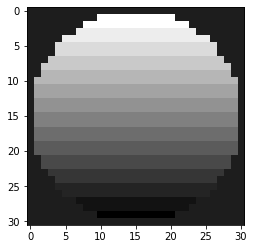

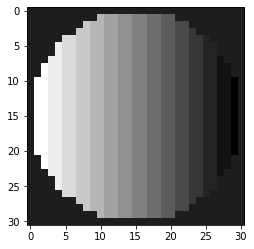

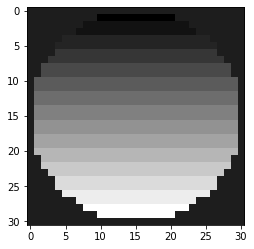

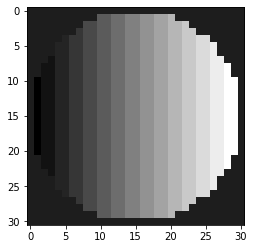

In [7]:
i = 0
for img in target+distractor:
    plt.figure(i)
    plt.imshow(img, cmap="gray")
    i += 1

In [8]:
# top_down
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], target[0], distractor[0])
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite(top_down_path + 'stimuli/' + file_name, stim_img)
        cv2.imwrite(top_down_path + "target/" + file_name, tar_img)
        cv2.imwrite(top_down_path + "gt/" + file_name, gt_img)

# left_right
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], target[1], distractor[1])
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite(left_right_path + 'stimuli/' + file_name, stim_img)
        cv2.imwrite(left_right_path + "target/" + file_name, tar_img)
        cv2.imwrite(left_right_path + "gt/" + file_name, gt_img)